In [293]:
import statsmodels.api as sms
from sklearn import datasets 
import numpy as np
from sklearn import linear_model
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import nltk 
nltk.download('vader_lexicon')
nltk.download('punkt')
from nltk.tokenize import word_tokenize 
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/felixnicholson/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/felixnicholson/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [294]:
# Load the CSV file (house_price.csv).
tr = pd.read_csv('turtle_reviews.csv')  
# Print the DataFrame.
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [295]:
#Remove redundant columns (language and platform)
tr.drop(['language', 'platform'], axis=1, inplace=True)
#check the DF 
tr

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


In [296]:
#Rename Columns
tr_renamed =tr.rename(columns={'spending_score (1-100)':'spending_score','remuneration (k£)':'remuneration'})

In [297]:
#Export the cleaned CSV
tr_renamed 
tr_renamed.to_csv('turtle_reviews_cleaned.csv')

In [298]:
# Load the clean CSV file (house_price.csv).
tr_2 = pd.read_csv('turtle_reviews_cleaned.csv')  

# Print the DataFrame
tr_2.head()

,Unnamed: 0,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [299]:
# Define the dependent variable.
y = tr_2['loyalty_points'] 

# Define the independent variable.
X = tr_2[['age', 'remuneration','spending_score']] 

In [300]:
# Define the dependent variable.
y = tr_2['loyalty_points'] 

# Define the independent variable.
X = tr_2[['age', 'remuneration','spending_score']] 
X = sms.add_constant(X)
est = sms.OLS(y, X).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     3491.
Date:                Thu, 20 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:56:56   Log-Likelihood:                -15320.
No. Observations:                2000   AIC:                         3.065e+04
Df Residuals:                    1996   BIC:                         3.067e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2203.0598     52.361    -42.

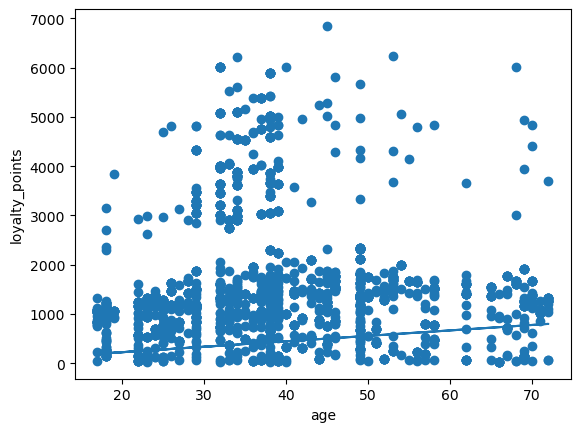

In [301]:
#Plot loyalty points VS age 

m = tr_2.age
n = tr_2.loyalty_points
plt.scatter(m,n)
plt.plot(m,11.0607*m+1)
plt.xlabel(m.name)
plt.ylabel(n.name)
plt.show()

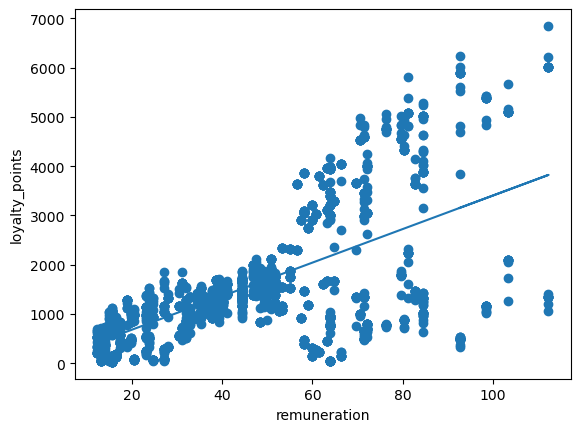

In [302]:
#Plot loyalty points VS remuneration 

m = tr_2.remuneration
n = tr_2.loyalty_points
plt.scatter(m,n)
plt.plot(m,34.0084*m+1)
plt.xlabel(m.name)
plt.ylabel(n.name)
plt.show()

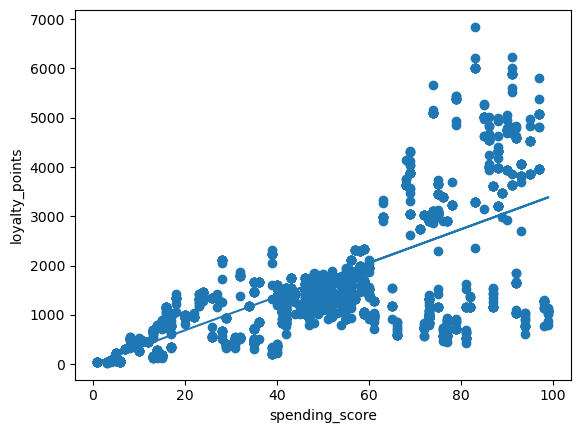

In [303]:
#Plot loyalty points VS spending score 
m = tr_2.spending_score
n = tr_2.loyalty_points
plt.scatter(m,n)
plt.plot(m,34.1832*m+1)
plt.xlabel(m.name)
plt.ylabel(n.name)
plt.show()

## AA2 - K- Means 

In [304]:
#Make a new working DF
df2 = tr_2[["spending_score","remuneration"]]
df2.head()

,spending_score,remuneration
0,39,12.30
1,81,12.30
2,6,13.12
3,77,13.12
4,40,13.94


## 3. Visualise the data

<AxesSubplot:xlabel='spending_score', ylabel='remuneration'>

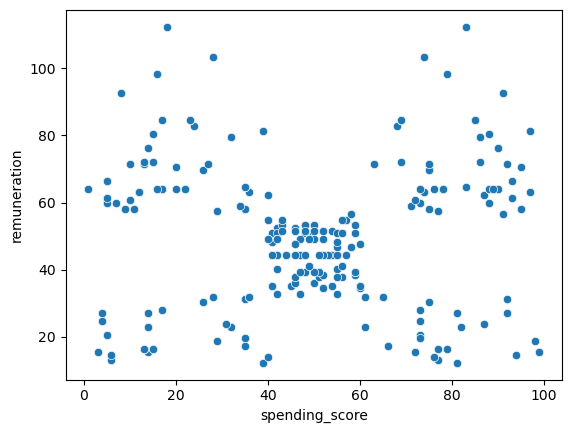

In [305]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='spending_score',
                y='remuneration',
                data=df2)

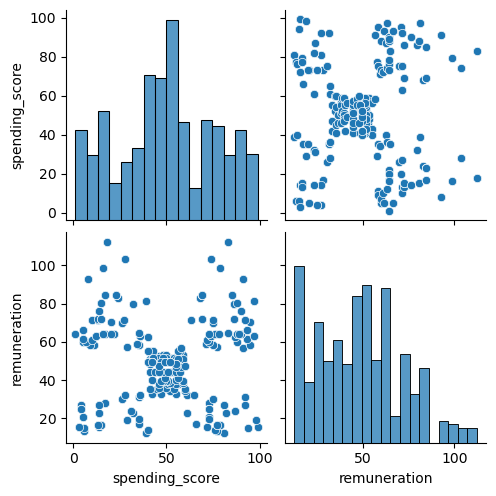

In [306]:
# Create a pairplot with Seaborn.
x = df2[['spending_score', 'remuneration']]
sns.pairplot(df2,
             vars=x)

##  Use the elbow method 

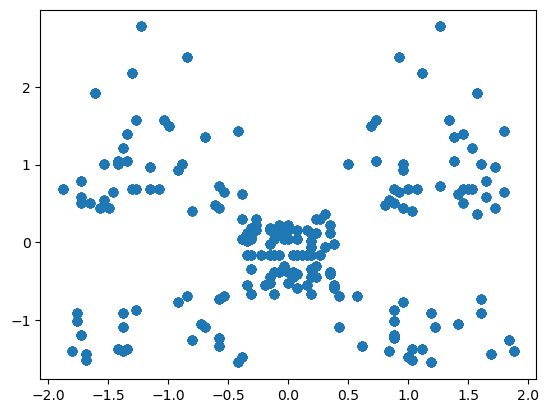

In [307]:
fork = df2[['spending_score', 'remuneration']]
#sns.scatterplot(x='spending_score', y='remuneration', data=fork)
far = fork.to_numpy()
scaler = StandardScaler()
sf = scaler.fit_transform(far)
plt.scatter(x = sf[:,0], y = sf[:,1])

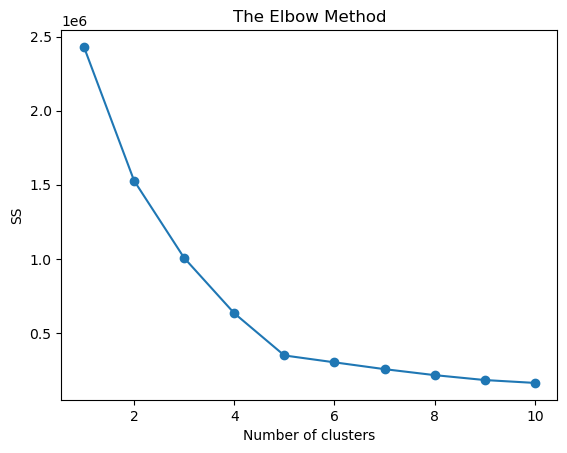

In [308]:
# Import the KMeans class.
from sklearn.cluster import KMeans 

# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++', 
                    max_iter = 500,
                    n_init = 10,
                    random_state = 42)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

plt.plot(range(1, 11),
         ss,
         marker='o')

plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS")

plt.show()

##  Use the silhouette method 

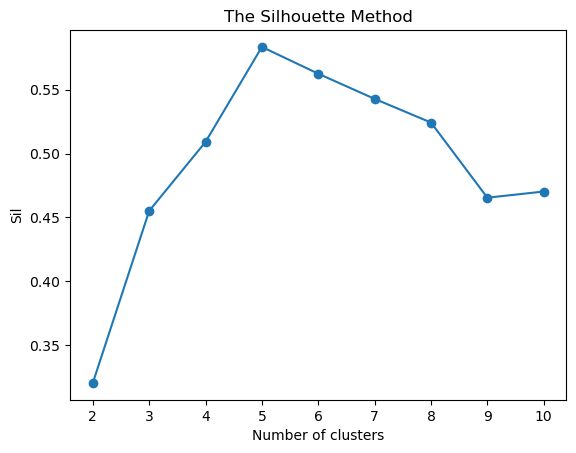

In [309]:
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

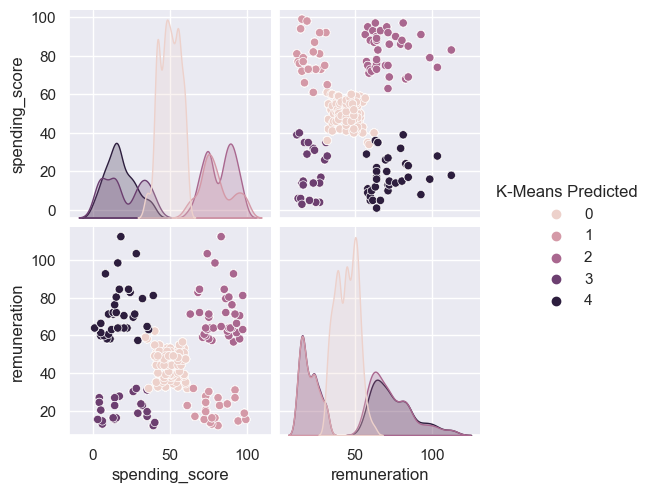

In [470]:
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [471]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
2    356
4    330
3    271
1    269
Name: K-Means Predicted, dtype: int64

In [472]:
# View the K-Means predicted.
print(x.head())

   spending_score  remuneration  K-Means Predicted
0              39         12.30                  3
1              81         12.30                  1
2               6         13.12                  3
3              77         13.12                  1
4              40         13.94                  3


<AxesSubplot:xlabel='spending_score', ylabel='remuneration'>

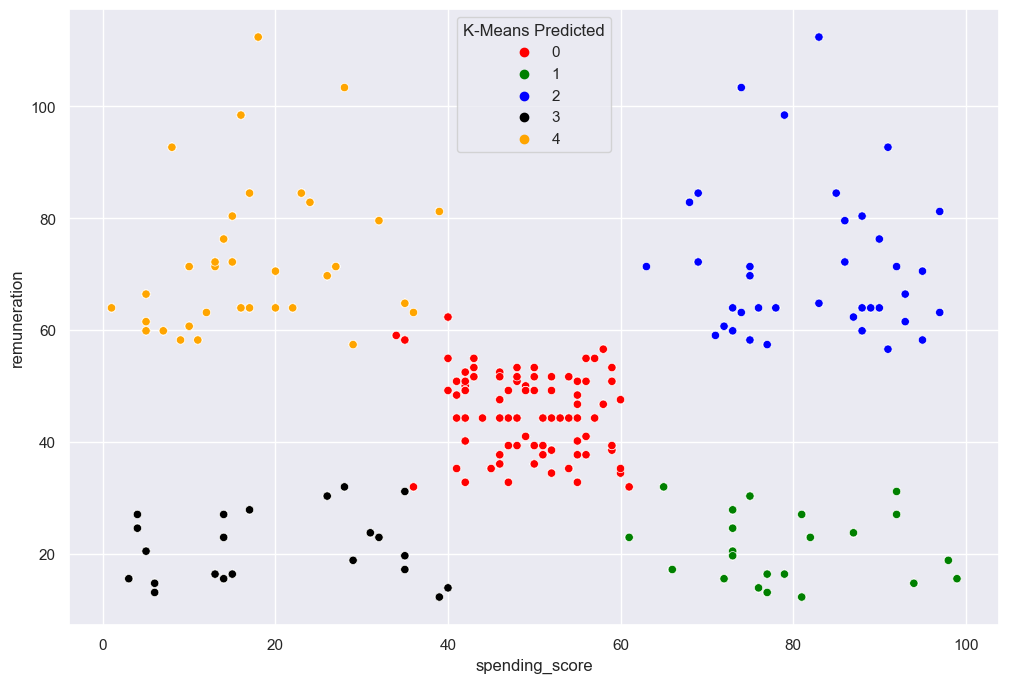

In [475]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='spending_score' , 
                y ='remuneration',
                data=x ,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black','orange'])

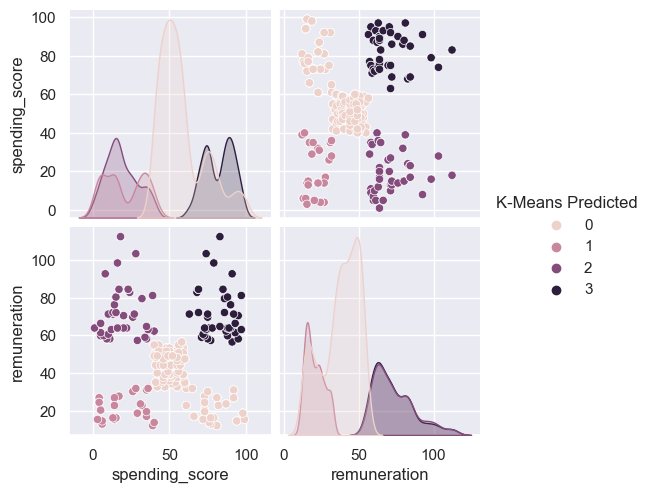

In [476]:
# Use 4 clusters:
kmeans = KMeans(n_clusters = 4,
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [477]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    1013
3     356
2     351
1     280
Name: K-Means Predicted, dtype: int64

In [478]:
# View the K-Means predicted.
print(x.head())

   spending_score  remuneration  K-Means Predicted
0              39         12.30                  1
1              81         12.30                  0
2               6         13.12                  1
3              77         13.12                  0
4              40         13.94                  1


<AxesSubplot:xlabel='spending_score', ylabel='remuneration'>

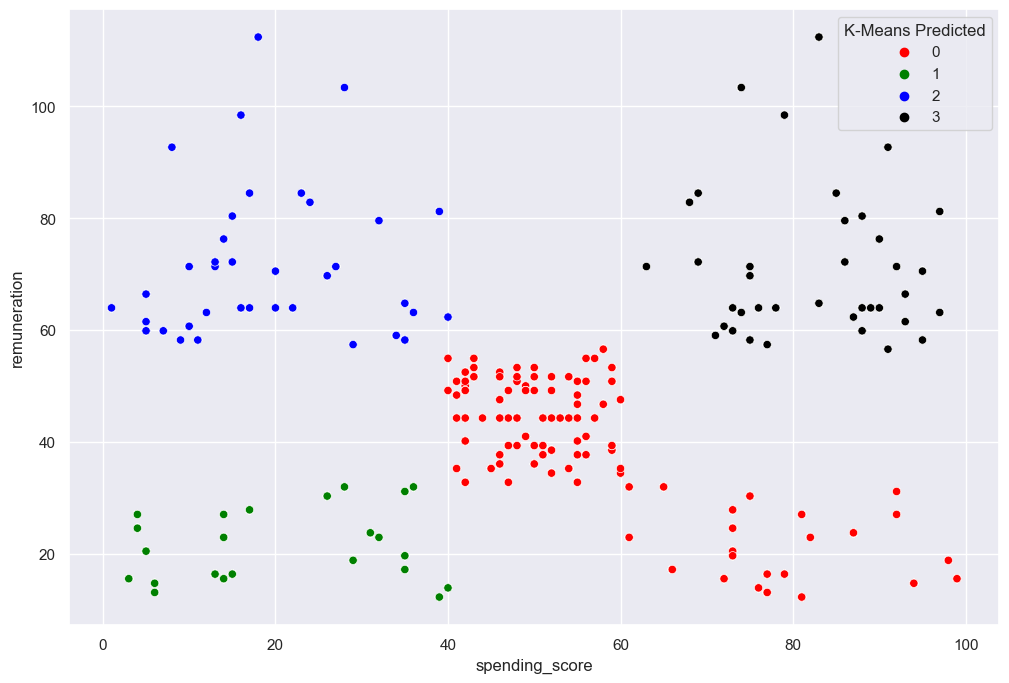

In [479]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='spending_score' , 
                y ='remuneration',
                data=x ,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue','black'])

In [ ]:
#Conclusion - Given the higher silouette score k = 5, plus the shape of the original data I have decided to use 4 cluster.

##  Analyse Customer Sentiments with Reviews

In [112]:
#Make a data frame with relevant columns 
sa = tr [["review","summary"]]
sa.shape

(2000, 2)

In [113]:
#Drop null values 
sa.dropna(subset =['review','summary'],inplace=True)
sa.shape

(2000, 2)

In [114]:
#Convert column text to lowercase 
sa['review']= sa['review'].apply(lambda x:" ".join(x.lower()for x in x.split()))
sa['summary']= sa['summary'].apply(lambda x:" ".join(x.lower()for x in x.split()))
sa.head()

,review,summary
0,"when it comes to a dm's screen, the space on t...",the fact that 50% of this space is wasted on a...
1,an open letter to galeforce9*: your unpainted ...,another worthless dungeon master's screen from...
2,"nice art, nice printing. why two panels are fi...","pretty, but also pretty useless"
3,amazing buy! bought it as a gift for our new d...,five stars
4,as my review of gf9's previous screens these w...,money trap


In [115]:
#Remove punctuation 
sa['review'] = sa['review'].str.replace('[^\w\s]','')
sa['summary'] = sa['summary'].str.replace('[^\w\s]','')
sa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   2000 non-null   object
 1   summary  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [116]:
#WORDCLOUD 1  - Make New DF 

In [285]:
dfr = sa[['review']].copy()
dfr.head()

,review
0,when it comes to a dms screen the space on the...
1,an open letter to galeforce9 your unpainted mi...
2,nice art nice printing why two panels are fill...
3,amazing buy bought it as a gift for our new dm...
4,as my review of gf9s previous screens these we...


In [118]:
#Drop duplicates for review 
dfr.review.duplicated().sum()

50

In [119]:
dfr2 =dfr.drop_duplicates(subset=['review'])
dfr2.reset_index(inplace=True)
dfr2

,index,review
0,0,when it comes to a dms screen the space on the...
1,1,an open letter to galeforce9 your unpainted mi...
2,2,nice art nice printing why two panels are fill...
3,3,amazing buy bought it as a gift for our new dm...
4,4,as my review of gf9s previous screens these we...
...,...,...
1945,1994,we are retired and find this a great way to st...
1946,1995,the perfect word game for mixed ages with mom ...
1947,1996,great game did not think i would like it when ...
1948,1997,great game for all keeps the mind nimble


In [120]:
dfr2['tokens'] = dfr2['review'].apply(word_tokenize)
dfr2['tokens'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: tokens, dtype: object

In [121]:
#Define an empty list of tokens 
all_tokens = []
for i in range (dfr2.shape[0]): 
      #add each token to the list 
    all_tokens = all_tokens + dfr2['tokens'][i]

In [122]:
from nltk.probability import FreqDist
#Caculate the frequency distribution 
fdist = FreqDist(all_tokens)
fdist

FreqDist({'the': 5449, 'and': 3233, 'to': 3162, 'a': 3159, 'of': 2487, 'i': 2089, 'it': 2082, 'is': 1781, 'this': 1774, 'game': 1668, ...})

In [128]:
tokens1 = [word for word in all_tokens if word.isalnum()]

['when',
 'it',
 'comes',
 'to',
 'a',
 'dms',
 'screen',
 'the',
 'space',
 'on',
 'the',
 'screen',
 'itself',
 'is',
 'at',
 'an',
 'absolute',
 'premium',
 'the',
 'fact',
 'that',
 '50',
 'of',
 'this',
 'space',
 'is',
 'wasted',
 'on',
 'art',
 'and',
 'not',
 'terribly',
 'informative',
 'or',
 'needed',
 'art',
 'as',
 'well',
 'makes',
 'it',
 'completely',
 'useless',
 'the',
 'only',
 'reason',
 'that',
 'i',
 'gave',
 'it',
 '2',
 'stars',
 'and',
 'not',
 '1',
 'was',
 'that',
 'technically',
 'speaking',
 'it',
 'can',
 'at',
 'least',
 'still',
 'stand',
 'up',
 'to',
 'block',
 'your',
 'notes',
 'and',
 'dice',
 'rolls',
 'other',
 'than',
 'that',
 'it',
 'drops',
 'the',
 'ball',
 'completely',
 'an',
 'open',
 'letter',
 'to',
 'galeforce9',
 'your',
 'unpainted',
 'miniatures',
 'are',
 'very',
 'not',
 'bad',
 'your',
 'spell',
 'cards',
 'are',
 'great',
 'your',
 'board',
 'games',
 'are',
 'meh',
 'your',
 'dm',
 'screens',
 'however',
 'are',
 'freaking',
 't

In [130]:
#Download the stop word list 

nltk.download('stopwords')
from nltk.corpus import stopwords 
#Create an english set of stopwords 
english_stopwords = set(stopwords.words('english'))
#Create a filtered list of tokens without stop words 
tokens2 = [x for x in all_tokens if x.lower() not in english_stopwords]
#Define empty string variable 
tokens2_string = '' 
for value in tokens2:
        #Add each filtered token word to the string 
    tokens2_string = tokens2_string + value + ' '  

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/felixnicholson/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


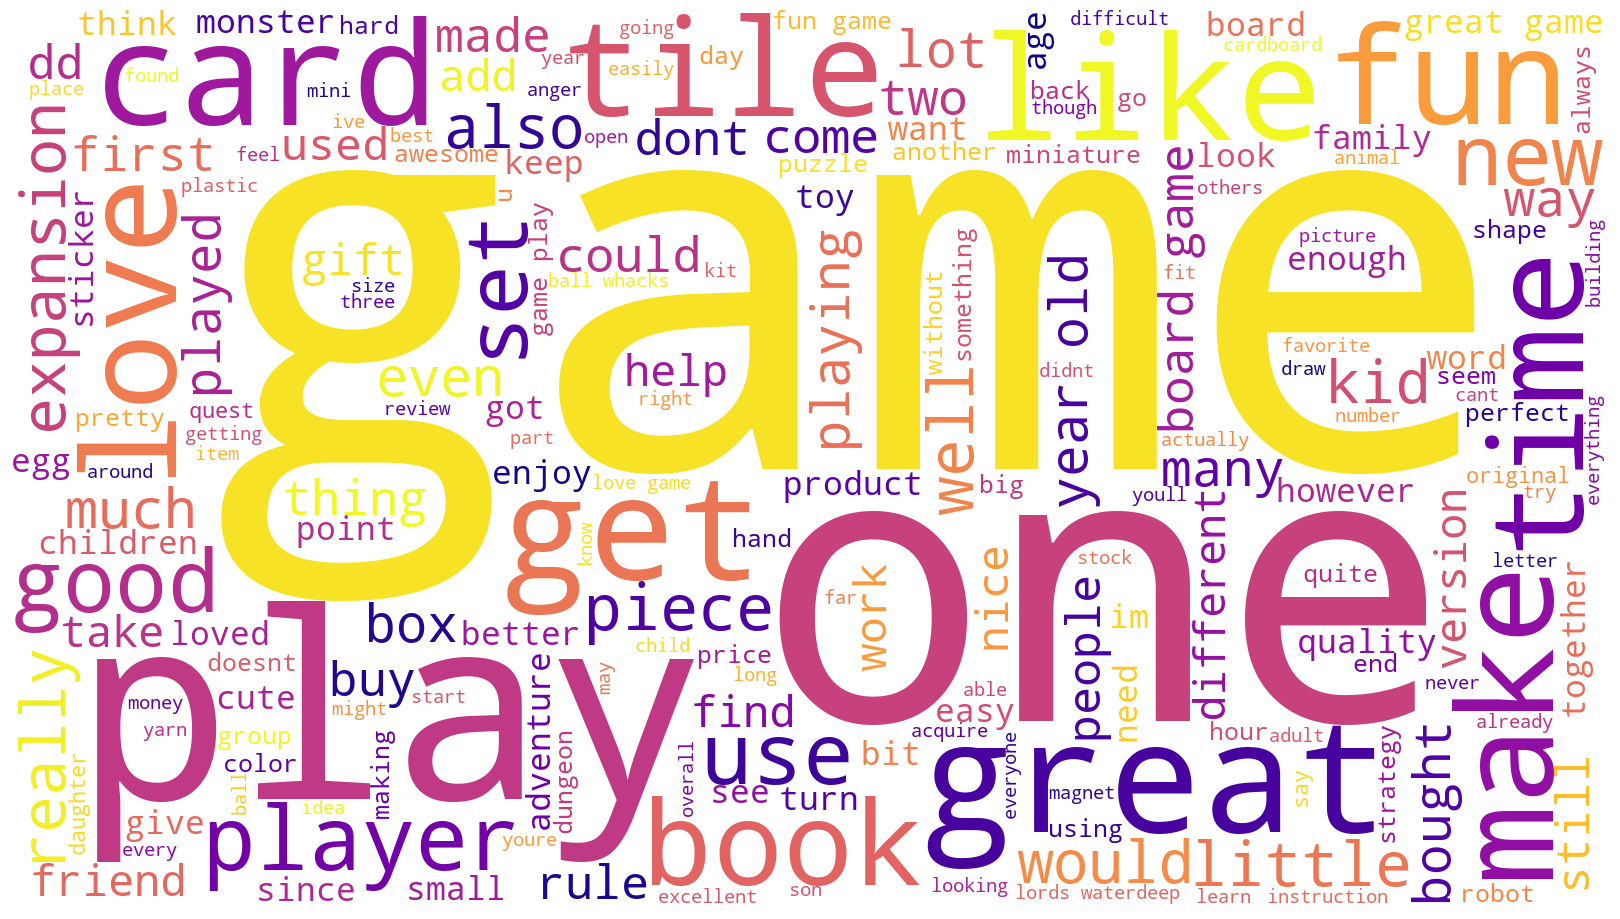

In [131]:
wordcloud = WordCloud(width = 1600, height = 900, 
                      background_color = 'white',
                      colormap = 'plasma',
                      stopwords = 'none',
                      min_font_size = 10).generate(tokens2_string)

#plot the wordcloud image 

plt.figure(figsize = (16,9),facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [134]:
#WORDCLOUD 2 - Make New DF 

In [135]:
dfs = sa[['summary']].copy()
dfs

,summary
0,the fact that 50 of this space is wasted on ar...
1,another worthless dungeon masters screen from ...
2,pretty but also pretty useless
3,five stars
4,money trap
...,...
1995,the perfect word game for mixed ages with mom
1996,super fun
1997,great game
1998,four stars


In [136]:
#Drop duplicates for review 
dfs.summary.duplicated().sum()

649

In [137]:
dfs2 =dfs.drop_duplicates(subset=['summary'])
dfs2.reset_index(inplace=True)
dfs2

,index,summary
0,0,the fact that 50 of this space is wasted on ar...
1,1,another worthless dungeon masters screen from ...
2,2,pretty but also pretty useless
3,3,five stars
4,4,money trap
...,...,...
1346,1989,this is a fun card game for people who like words
1347,1990,sort of a card game equivalent of scrabble and...
1348,1992,great game to keep the mind active
1349,1994,a great mind game


In [138]:
dfs2['tokens'] = dfs2['summary'].apply(word_tokenize)
dfs2['tokens'].head()

0    [the, fact, that, 50, of, this, space, is, was...
1    [another, worthless, dungeon, masters, screen,...
2                 [pretty, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: tokens, dtype: object

In [193]:
#Define an empty list of tokens 
all_tokens2 = []
for i in range (dfs2.shape[0]): 
      #add each token to the list 
    all_tokens2 = all_tokens2 + dfs2['tokens'][i] 

['the',
 'fact',
 'that',
 '50',
 'of',
 'this',
 'space',
 'is',
 'wasted',
 'on',
 'art',
 'and',
 'not',
 'terribly',
 'informative',
 'or',
 'needed',
 'art',
 'another',
 'worthless',
 'dungeon',
 'masters',
 'screen',
 'from',
 'galeforce9',
 'pretty',
 'but',
 'also',
 'pretty',
 'useless',
 'five',
 'stars',
 'money',
 'trap',
 'best',
 'gm',
 'screen',
 'ever',
 'great',
 'but',
 'could',
 'be',
 'even',
 'better',
 'another',
 'missed',
 'opportunity',
 'not',
 'a',
 'value',
 'add',
 'to',
 'the',
 'product',
 'line',
 'love',
 'the',
 'map',
 'not',
 'a',
 'general',
 'dm',
 'screen',
 'very',
 'weak',
 'game',
 'fell',
 'completely',
 'flat',
 'good',
 'book',
 'buckley',
 'was',
 'a',
 'card',
 'mommer',
 'very',
 'advanced',
 'but',
 'as',
 'good',
 'as',
 'it',
 'gets',
 'you',
 'better',
 'know',
 'what',
 'youre',
 'getting',
 'into',
 'dont',
 'bother',
 'the',
 'worst',
 'value',
 'ive',
 'ever',
 'seen',
 'not',
 'enough',
 'product',
 'good',
 'product',
 'but',
 

In [140]:
#Caculate the frequency distribution 
fdist = FreqDist(all_tokens2)
fdist

FreqDist({'game': 268, 'the': 258, 'a': 238, 'great': 237, 'for': 229, 'to': 192, 'fun': 175, 'and': 168, 'it': 139, 'of': 131, ...})

In [141]:
#Tokenize words
tokens3 = [word for word in all_tokens2 if word.isalnum()]

In [142]:
#Create an english set of stopwords 
english_stopwords = set(stopwords.words('english'))

#Create a filtered list of tokens without stop words 
tokens3 = [x for x in all_tokens if x.lower() not in english_stopwords]

#Define empty string variable 
tokens3_string = '' 
for value in tokens3:
        #Add each filtered token word to the string 
    tokens3_string = tokens3_string + value + ' '

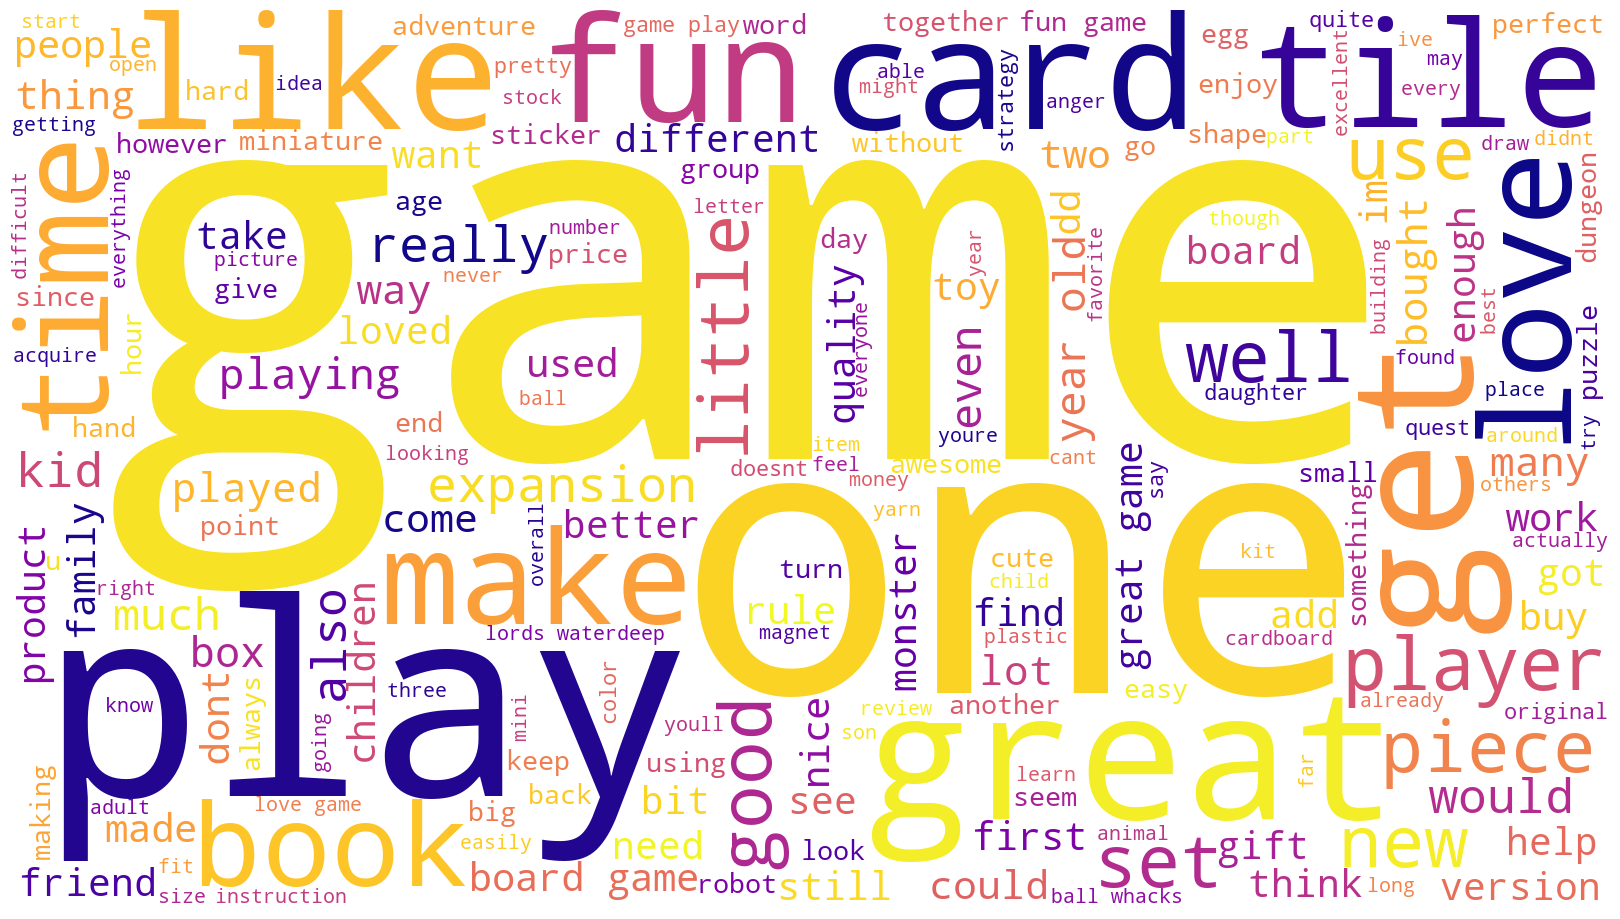

In [143]:
wordcloud = WordCloud(width = 1600, height = 900, 
                      background_color = 'white',
                      colormap = 'plasma',
                      stopwords = 'none',
                      min_font_size = 10).generate(tokens3_string)

#plot the wordcloud image 

plt.figure(figsize = (16,9),facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [281]:
##CountWords 

['comes',
 'dms',
 'screen',
 'space',
 'screen',
 'absolute',
 'premium',
 'fact',
 '50',
 'space',
 'wasted',
 'art',
 'terribly',
 'informative',
 'needed',
 'art',
 'well',
 'makes',
 'completely',
 'useless',
 'reason',
 'gave',
 '2',
 'stars',
 '1',
 'technically',
 'speaking',
 'least',
 'still',
 'stand',
 'block',
 'notes',
 'dice',
 'rolls',
 'drops',
 'ball',
 'completely',
 'open',
 'letter',
 'galeforce9',
 'unpainted',
 'miniatures',
 'bad',
 'spell',
 'cards',
 'great',
 'board',
 'games',
 'meh',
 'dm',
 'screens',
 'however',
 'freaking',
 'terrible',
 'im',
 'still',
 'waiting',
 'single',
 'screen',
 'isnt',
 'polluted',
 'pointless',
 'artwork',
 'useful',
 'referenceable',
 'tables',
 'youve',
 'created',
 'single',
 'use',
 'screen',
 'useful',
 'running',
 'storm',
 'kings',
 'thunder',
 'adventure',
 'even',
 'despite',
 'fact',
 'geared',
 'adventure',
 'path',
 'usefulness',
 'negligible',
 'best',
 'massive',
 'swath',
 'inner',
 'panel',
 'wasted',
 'artwork

In [181]:
#import the Counter class 

from collections import Counter 
#Generate DF from Counter

counts = pd.DataFrame (Counter(tokens2).most_common(20),
                       columns=['review','summary']).set_index('review')
#Display the result
counts.reset_index(inplace=True)     

counts

,review,summary
0,game,1668
1,great,579
2,fun,549
3,one,530
4,play,502
5,like,414
6,love,322
7,really,319
8,get,319
9,cards,301


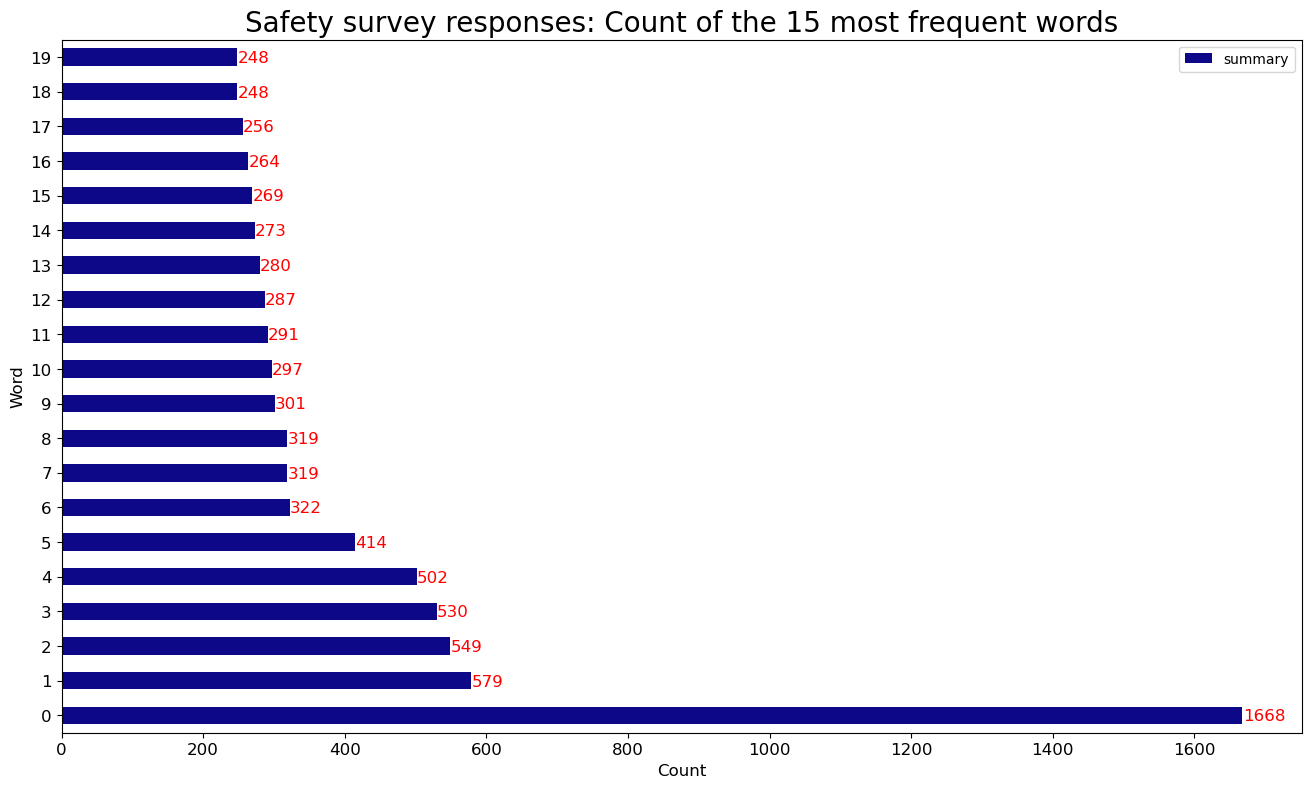

In [182]:
# Set the plot type.
ax = counts.plot(kind='barh', figsize=(16, 9), fontsize=12, colormap ='plasma')
# Set the Labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title('Safety survey responses: Count of the 15 most frequent words', fontsize=20)
#Draw the bar Labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)), fontsize=12, color='red')

In [154]:
# Import nltk and the required resources.
import nltk
from nltk.corpus import stopwords
from nltk.corpus import words

nltk.download('stopwords')
nltk.download('words')
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/felixnicholson/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/felixnicholson/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [183]:
#Show top 20 most common words
counts

,review,summary
0,game,1668
1,great,579
2,fun,549
3,one,530
4,play,502
5,like,414
6,love,322
7,really,319
8,get,319
9,cards,301


In [186]:
#Convert counts DF to list
counts2 = counts.review.values.tolist()
counts2

['game',
 'great',
 'fun',
 'one',
 'play',
 'like',
 'love',
 'really',
 'get',
 'cards',
 'tiles',
 'time',
 'good',
 'would',
 'book',
 'well',
 'new',
 'games',
 'little',
 'much']

In [284]:
for word in counts2:
    print(f'The sentiment value of the word :"{word}" is : {score}')
    score = sia.polarity_scores(word)['compound'] 
    # Display the scores.

The sentiment value of the word :"game" is : 0.0
The sentiment value of the word :"great" is : 0.0
The sentiment value of the word :"fun" is : 0.6249
The sentiment value of the word :"one" is : 0.5106
The sentiment value of the word :"play" is : 0.0
The sentiment value of the word :"like" is : 0.34
The sentiment value of the word :"love" is : 0.3612
The sentiment value of the word :"really" is : 0.6369
The sentiment value of the word :"get" is : 0.0
The sentiment value of the word :"cards" is : 0.0
The sentiment value of the word :"tiles" is : 0.0
The sentiment value of the word :"time" is : 0.0
The sentiment value of the word :"good" is : 0.0
The sentiment value of the word :"would" is : 0.4404
The sentiment value of the word :"book" is : 0.0
The sentiment value of the word :"well" is : 0.0
The sentiment value of the word :"new" is : 0.2732
The sentiment value of the word :"games" is : 0.0
The sentiment value of the word :"little" is : 0.0
The sentiment value of the word :"much" is : 

[Text(0.5, 1.0, 'Sentiment Polarity for 20 most common words')]

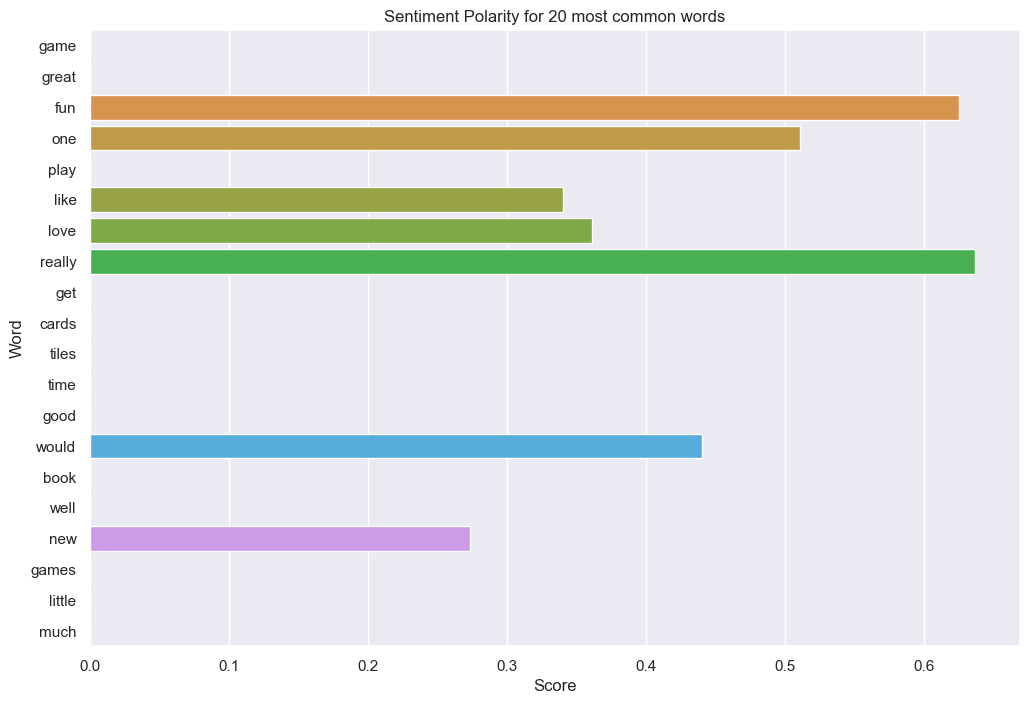

In [469]:
#Make a dataframe of scored words
words = {'Word':['game', 'great', 'fun', 'one','play','like','love','really','get','cards','tiles','time','good','would','book','well','new','games','little','much'],
         'Score':['0.0', '0.0', '0.6249', '0.5106','0.0','0.34', '0.3612', '0.6369','0.0','0.0','0.0','0.0','0.0','0.4404','0.0','0.0','0.2732','0.0','0.0','0.0']}
words_df = pd.DataFrame(words)
words_df

#Convert score column to numeric 
words_df["Score"] = pd.to_numeric(words_df["Score"])

#Make plot
sns.barplot(data=words_df, x='Score',y='Word').set(title='Sentiment Polarity for 20 most common words')

In [453]:
#Identify and print the top 20 positive reviews and summaries and the top 20 negative reviews and summaries, respectively.

#Make list for for loop 
dfl = dfr['review'].tolist()
    
#Make empty variable to be filled 
r_scr = []
for sentence in dfl:
    hv = [{sentence}, {score}]
    r_scr.append(hv)
    score = sia.polarity_scores(sentence)['compound']
#Convert to DF 
r_scr_df = pd.DataFrame(r_scr)
r_scr_df.reset_index(inplace=True)
r_scr_df    

,index,0,1
0,0,{when it comes to a dms screen the space on th...,{0.5209}
1,1,{an open letter to galeforce9 your unpainted m...,{-0.6333}
2,2,{nice art nice printing why two panels are fil...,{0.9404}
3,3,{amazing buy bought it as a gift for our new d...,{-0.0045}
4,4,{as my review of gf9s previous screens these w...,{0.886}
...,...,...,...
1995,1995,{the perfect word game for mixed ages with mom...,{0.9178}
1996,1996,{great game did not think i would like it when...,{0.9137}
1997,1997,{great game for all keeps the mind nimble},{0.8606}
1998,1998,{fun game},{0.6249}


In [462]:
#Show 20 most positive reviews
#Tidy the DF for further analysis 
r_scr_df.rename(columns={r_scr_df.columns[1]: 'review',r_scr_df.columns[2]: 'score'},inplace=True)
r_scr_df['score'] = r_scr_df['score'].astype(str)

#Remove uneccescary symbols 
r_scr_df['score'] = r_scr_df['score'].str.replace('{',' ')
r_scr_df['score'] = r_scr_df['score'].str.replace('}',' ')

#Convert to numeric 
r_scr_df["score"] = pd.to_numeric(r_scr_df["score"])

#Sort best reviews first 
rsort = r_scr_df.sort_values(by=['score'], ascending=False)
top20 = rsort.iloc[0:20,]

#Export results
top20.to_csv('top20.csv')

In [463]:
#Sort worst reviews first 
rsort = r_scr_df.sort_values(by=['score'], ascending=True)
bottom20 = rsort.iloc[0:20,]
#Export results
bottom20.to_csv('bottom20.csv')

In [464]:
#Repeat the above process but for summaries

#Make list for for loop 
dfl2 = dfs2['summary'].tolist()
    
#Make empty variable to be filled 
r_scs = []
for sentence in dfl2:
    hv2 = [{sentence}, {score}]
    r_scs.append(hv2)
    score = sia.polarity_scores(sentence)['compound']
#Convert to DF 
r_scs_df = pd.DataFrame(r_scs)
r_scs_df.reset_index(inplace=True)
r_scs_df    

,index,0,1
0,0,{the fact that 50 of this space is wasted on a...,{0.5209}
1,1,{another worthless dungeon masters screen from...,{-0.0711}
2,2,{pretty but also pretty useless},{-0.4404}
3,3,{five stars},{0.4019}
4,4,{money trap},{0.0}
...,...,...,...
1346,1346,{this is a fun card game for people who like w...,{0.6249}
1347,1347,{sort of a card game equivalent of scrabble an...,{0.7003}
1348,1348,{great game to keep the mind active},{0.4215}
1349,1349,{a great mind game},{0.7783}


In [465]:
#Show 20 most positive summaries
#Tidy the DF for further analysis
r_scs_df.rename(columns={r_scs_df.columns[1]: 'summary',r_scs_df.columns[2]: 'score'},inplace=True)
r_scs_df['score'] = r_scs_df['score'].astype(str)

#Remove uneccescary symbols 
r_scs_df['score'] = r_scs_df['score'].str.replace('{',' ')
r_scs_df['score'] = r_scs_df['score'].str.replace('}',' ')

#Convert to numeric 
r_scs_df["score"] = pd.to_numeric(r_scs_df["score"])

#Sort best summaries first 
rsort_sum = r_scs_df.sort_values(by=['score'], ascending=False)
top20_summaries = rsort_sum.iloc[0:20,]

#Export results
top20_summaries.to_csv('top20_summaries.csv')

In [468]:
#Sort summaries  first 
rsort_sum = r_scs_df.sort_values(by=['score'], ascending=True)
bottom20_summaries = rsort_sum.iloc[0:20,]

#Export results
bottom20_summaries.to_csv('bottom20_summaries.csv')